In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
data = pd.read_csv(r"D:\Data\diminos_data.csv")

In [3]:
data

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056
...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358


In [4]:
data.shape
data.info()

(15000, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


### Converting the dtypes of the columns

In [5]:
data.order_placed_at=pd.to_datetime(data.order_placed_at,format='%Y/%m/%d %H:%M:%S')
data.order_delivered_at=pd.to_datetime(data.order_delivered_at,format='%Y/%m/%d %H:%M:%S')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 351.7 KB


In [7]:
data['day'] = data.order_delivered_at.dt.day_name()

In [8]:
data['placed_time'] = data.order_placed_at.dt.minute
data['order_time'] = data.order_delivered_at.dt.minute
data['month'] = data.order_placed_at.dt.month
data['day_of_the_month'] = data.order_delivered_at.dt.day
data['hours'] = data.order_placed_at.dt.hour
data['total_seconds'] = data.order_delivered_at.dt.second

In [9]:
data['delivery_in_time']=(data["order_delivered_at"]-data["order_placed_at"]).dt.total_seconds()/60

In [10]:
data

,order_id,order_placed_at,order_delivered_at,day,placed_time,order_time,month,day_of_the_month,hours,total_seconds,delivery_in_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,Wednesday,0,18,3,1,0,7,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,Wednesday,3,19,3,1,0,34,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,Wednesday,7,22,3,1,0,28,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,Wednesday,7,46,3,1,0,19,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,Wednesday,9,25,3,1,0,13,16.176984
...,...,...,...,...,...,...,...,...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,Monday,37,52,3,27,23,37,15.540156
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,Tuesday,47,4,3,28,23,22,16.744549
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,Tuesday,50,5,3,28,23,40,15.411271
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,Tuesday,52,8,3,28,23,41,15.963506


In [11]:
data['delivery_time'] = abs(data.order_time - data.placed_time)

In [12]:
data

,order_id,order_placed_at,order_delivered_at,day,placed_time,order_time,month,day_of_the_month,hours,total_seconds,delivery_in_time,delivery_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,Wednesday,0,18,3,1,0,7,17.140719,18
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,Wednesday,3,19,3,1,0,34,15.598754,16
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,Wednesday,7,22,3,1,0,28,15.104856,15
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,Wednesday,7,46,3,1,0,19,38.533657,39
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,Wednesday,9,25,3,1,0,13,16.176984,16
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,Monday,37,52,3,27,23,37,15.540156,15
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,Tuesday,47,4,3,28,23,22,16.744549,43
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,Tuesday,50,5,3,28,23,40,15.411271,45
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,Tuesday,52,8,3,28,23,41,15.963506,44


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
 3   day                 15000 non-null  object        
 4   placed_time         15000 non-null  int64         
 5   order_time          15000 non-null  int64         
 6   month               15000 non-null  int64         
 7   day_of_the_month    15000 non-null  int64         
 8   hours               15000 non-null  int64         
 9   total_seconds       15000 non-null  int64         
 10  delivery_in_time    15000 non-null  float64       
 11  delivery_time       15000 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(8), object(1)
memory usage: 1.4+ MB


### Descriptive statistics

In [14]:
data.describe()

,order_id,placed_time,order_time,month,day_of_the_month,hours,total_seconds,delivery_in_time,delivery_time
count,1.500000e+04,15000.000000,15000.000000,15000.0,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.530610e+06,29.324000,29.559333,3.0,13.964533,11.559200,29.398933,20.499389,23.780533
std,4.330271e+03,17.308948,17.255057,0.0,7.810319,6.948514,17.260106,96.160362,12.080219
min,1.523111e+06,0.000000,0.000000,3.0,1.000000,0.000000,0.000000,15.000010,0.000000
25%,1.526861e+06,14.000000,15.000000,3.0,7.000000,6.000000,15.000000,15.274826,15.000000
50%,1.530610e+06,29.000000,30.000000,3.0,14.000000,12.000000,29.000000,15.797986,16.000000
75%,1.534360e+06,44.000000,44.000000,3.0,21.000000,18.000000,44.000000,17.279661,38.000000
max,1.538110e+06,59.000000,59.000000,3.0,29.000000,23.000000,59.000000,7299.831375,56.000000


### Insights:
1. Minimum order time of the delivery is 23.7 minutes and Maximum order time of the delivery is 56 minutes.
2. Average Deliverys of the month are 13.96

In [15]:
data.day_of_the_month.value_counts()

22    595
10    594
20    590
2     586
12    581
6     579
7     579
23    579
8     575
4     568
24    567
9     562
18    558
27    553
16    548
5     547
1     546
25    545
15    542
17    538
26    535
11    533
3     530
13    529
21    526
19    524
14    486
28      4
29      1
Name: day_of_the_month, dtype: int64

In [16]:
data.day.value_counts(normalize=True)

Thursday     0.151667
Wednesday    0.150600
Monday       0.150067
Friday       0.148600
Saturday     0.146933
Sunday       0.145800
Tuesday      0.106333
Name: day, dtype: float64

In [17]:
data.groupby(['day']).agg({'delivery_time': ['mean','count']})

delivery_time      
                   mean count
day                          
Friday        23.969942  2229
Monday        23.921368  2251
Saturday      23.802178  2204
Sunday        23.384088  2187
Thursday      23.750769  2275
Tuesday       24.379937  1595
Wednesday     23.422753  2259

### Insights:
1. on Tuesday order are less compared to the other days

In [18]:
data.delivery_time[data.delivery_time <= 31].count()
data.delivery_time[data.delivery_time > 31].count()

10929

4071

### Insights:
1. As we can say that No.of.orders less than 31 minutes are 10929 which is 72.86%.
2. 4071 orders are freely delivered.

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib style option
plt.style.use('fivethirtyeight')

### Identifying the Outliers

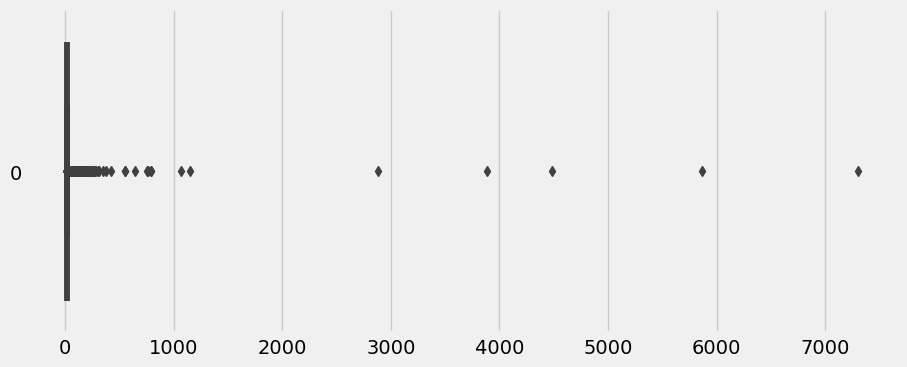

In [20]:
plt.figure(figsize=(10,4))
sns.boxplot(data.delivery_in_time, orient='h');

In [21]:
Q1,Q2,Q3 = tuple(data.delivery_in_time.quantile(q=[0.25,0.50,0.75]).values)

print(Q1,Q2,Q3)

IQR = Q3-Q1
UL = Q3+1.5*IQR
LL = Q1-1.5*IQR

print(IQR,UL,LL)

data[(data.delivery_in_time < LL) | (data.delivery_in_time > UL)]

drop_list = data[(data.delivery_in_time > UL) | (data.delivery_in_time < LL)].index.tolist()

data.drop(drop_list, axis=0, inplace=True)

15.274825995833332 15.797986066666667 17.27966090416667
2.0048349083333363 20.286913266666673 12.267573633333328


,order_id,order_placed_at,order_delivered_at,day,placed_time,order_time,month,day_of_the_month,hours,total_seconds,delivery_in_time,delivery_time
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,Wednesday,7,46,3,1,0,19,38.533657,39
6,1523117,2023-03-01 00:11:09,2023-03-01 00:41:54.245295,Wednesday,11,41,3,1,0,54,30.754088,30
16,1523127,2023-03-01 00:37:10,2023-03-01 01:01:14.587491,Wednesday,37,1,3,1,0,14,24.076458,36
18,1523129,2023-03-01 00:43:31,2023-03-01 01:03:52.000746,Wednesday,43,3,3,1,0,52,20.350012,40
24,1523135,2023-03-01 01:11:53,2023-03-01 05:07:54.563978,Wednesday,11,7,3,1,1,54,236.026066,4
...,...,...,...,...,...,...,...,...,...,...,...,...
14949,1538060,2023-03-27 21:56:34,2023-03-27 22:21:20.206661,Monday,56,21,3,27,21,20,24.770111,35
14953,1538064,2023-03-27 22:04:53,2023-03-27 22:55:03.230465,Monday,4,55,3,27,22,3,50.170508,51
14970,1538081,2023-03-27 22:41:56,2023-03-27 23:09:33.139446,Monday,41,9,3,27,22,33,27.618991,32
14974,1538085,2023-03-27 22:56:11,2023-03-27 23:18:16.194531,Monday,56,18,3,27,22,16,22.086576,38


In [22]:
data

,order_id,order_placed_at,order_delivered_at,day,placed_time,order_time,month,day_of_the_month,hours,total_seconds,delivery_in_time,delivery_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,Wednesday,0,18,3,1,0,7,17.140719,18
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,Wednesday,3,19,3,1,0,34,15.598754,16
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,Wednesday,7,22,3,1,0,28,15.104856,15
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,Wednesday,9,25,3,1,0,13,16.176984,16
5,1523116,2023-03-01 00:09:44,2023-03-01 00:25:17.088349,Wednesday,9,25,3,1,0,17,15.551472,16
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,Monday,37,52,3,27,23,37,15.540156,15
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,Tuesday,47,4,3,28,23,22,16.744549,43
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,Tuesday,50,5,3,28,23,40,15.411271,45
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,Tuesday,52,8,3,28,23,41,15.963506,44


## Analysis

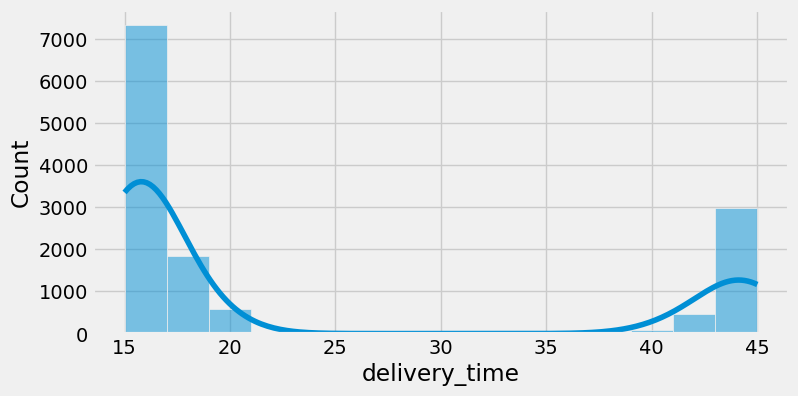

In [23]:
plt.figure(figsize=(8,4))
sns.histplot(data.delivery_time, kde=True);

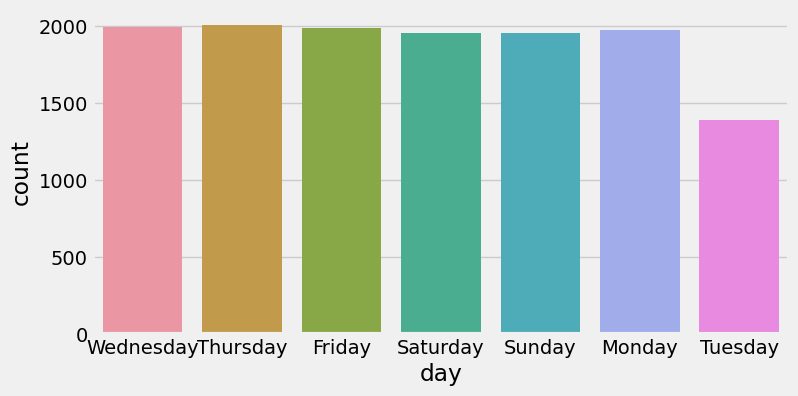

In [24]:
plt.figure(figsize=(8,4))
sns.countplot(x=data.day);

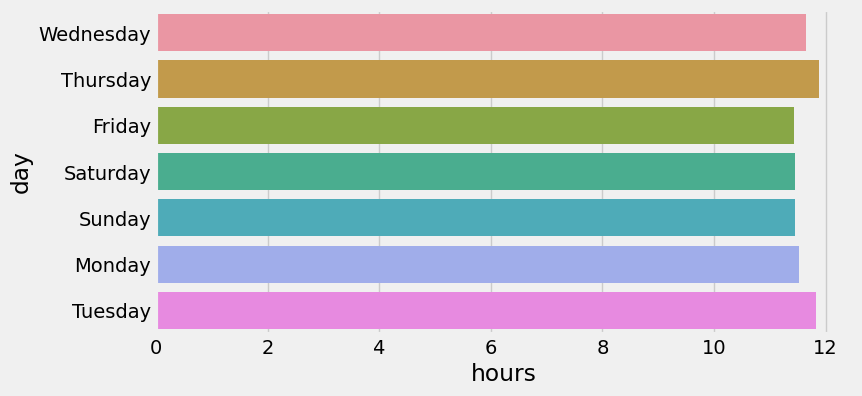

In [25]:
plt.figure(figsize=(8,4))
sns.barplot(x=data.hours,y=data.day, ci=False);

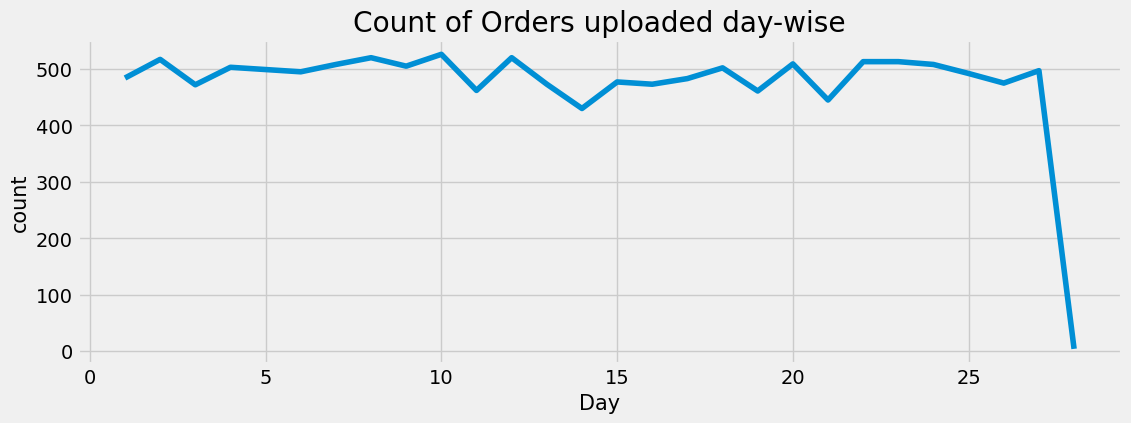

In [26]:
plt.figure(figsize=(12,4), dpi = 100)
sns.lineplot(x = data.day_of_the_month.value_counts().index,
             y = data.day_of_the_month.value_counts().values)
plt.title('Count of Orders uploaded day-wise')
plt.xlabel('Day',fontsize = 15, color = 'black')
plt.ylabel('count',fontsize = 15, color = 'black');

In [27]:
np.percentile(data.delivery_in_time,95)

18.78939552083333

In [28]:
data.delivery_in_time.quantile(0.95)

18.78939552083333

### Insights:
1. Maximum order=595
2. Minimum order=486 
3. Average order =551
4. Average delivery time =18.78 min.
5. Maximum order on wednesday 
6. Minimum order on Tuesday